In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
df=pd.read_csv('Dataset1.csv')
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,24x7Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,720,Kharghar,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000


In [2]:
df.shape

(6345, 16)

In [3]:
df.rename(columns={"24x7Security":"Security"},inplace=True)
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,720,Kharghar,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000
1,600,Kharghar,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000
2,650,Kharghar,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000
3,650,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000
4,665,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000


In [4]:
df['Price_per_sqrft']=df["Price"]/df["Area"]

In [5]:
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price,Price_per_sqrft
0,720,Kharghar,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000,6736.111111
1,600,Kharghar,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000,7500.000000
2,650,Kharghar,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000,10307.692308
3,650,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000,6923.076923
4,665,Kharghar,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000,7518.796992


In [6]:
location_room_encode=df.groupby(df['Location'])['Price_per_sqrft'].median().sort_values().index

In [7]:
# location_room_encode=location_room_encode.str.replace(' ','')
print(location_room_encode)

Index(['Ulhasnagar ', 'Khalapur', 'Karjat', 'Ambivli', 'Neral', 'Boisar',
       'Kewale', 'Asangaon', 'Shirgaon', 'Badlapur West',
       ...
       'Marine Lines', 'Malabar Hill', 'Agripada', 'Churchgate', 'Poddar Road',
       'Breach Candy', 'Off Nepean Sea Road', 'Girgaon', 'Willingdon',
       'Juhu Tara'],
      dtype='object', name='Location', length=411)


In [8]:
enumerate(location_room_encode,0)

In [9]:
loc_encode={k:i for i,k in enumerate(location_room_encode,0)}
loc_encode

{'Ulhasnagar ': 0,
 'Khalapur': 1,
 'Karjat': 2,
 'Ambivli': 3,
 'Neral': 4,
 'Boisar': 5,
 'Kewale': 6,
 'Asangaon': 7,
 'Shirgaon': 8,
 'Badlapur West': 9,
 'Vasind': 10,
 'Nere': 11,
 'Ambarnath': 12,
 'Vangani': 13,
 'Palghar': 14,
 'Badlapur': 15,
 'Badlapur East': 16,
 'Ambernath West': 17,
 'Vitthalwadi': 18,
 'Ambernath East': 19,
 'Titwala': 20,
 'Lokhandwala': 21,
 'Khopoli': 22,
 'Kasheli': 23,
 'KASHELI': 24,
 'Nalasopara West': 25,
 'Nala Sopara': 26,
 'Virar West': 27,
 'Virar': 28,
 'Virar East': 29,
 'Rutu Enclave': 30,
 'Sector-26 Taloja': 31,
 'Morya Nagar': 32,
 'Nilje Gaon': 33,
 'IT Colony': 34,
 'Diva Gaon': 35,
 'Nalasopara East': 36,
 'Naigaon East': 37,
 'Dronagiri': 38,
 'Powai Lake': 39,
 'Adaigaon': 40,
 'Palidevad': 41,
 'Bhoiwada Kalyan': 42,
 'Taloja': 43,
 'Taloje': 44,
 'Taloja Bypass Nitalas Link Road': 45,
 'Manvel pada Road': 46,
 'Vijay Nagar': 47,
 'Mumbai Central': 48,
 'Vasai east': 49,
 'Katrap': 50,
 'Taloja Panchanand': 51,
 'Koproli': 52,
 'S

In [10]:
# import pickle
# a_file = open("location_dict.pkl", "wb")
# pickle.dump(loc_encode, a_file)
# a_file.close()

In [11]:
df['Location']=df['Location'].map(loc_encode)

In [12]:
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price,Price_per_sqrft
0,720,144,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000,6736.111111
1,600,144,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000,7500.000000
2,650,144,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000,10307.692308
3,650,144,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000,6923.076923
4,665,144,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000,7518.796992


In [13]:
df=df.drop(['Price_per_sqrft'],axis=1)
df.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool,Price
0,720,144,1,0,1,1,1,0,0,0,0,0,0,0,0,4850000
1,600,144,1,1,1,1,1,0,1,0,0,0,0,1,1,4500000
2,650,144,1,1,1,1,1,1,1,1,0,0,0,1,1,6700000
3,650,144,1,0,1,1,1,0,0,1,1,0,0,0,0,4500000
4,665,144,1,0,1,1,1,0,0,1,1,0,0,0,0,5000000


In [14]:
continuous_var = df[['Area','Location','Price']]
continuous_var.head()

,Area,Location,Price
0,720,144,4850000
1,600,144,4500000
2,650,144,6700000
3,650,144,4500000
4,665,144,5000000


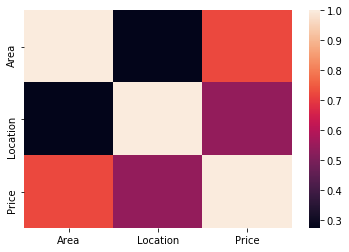

In [15]:
import seaborn as sns
sns.heatmap(continuous_var.corr())

In [16]:
discrete_variable=[features for features in df.columns if len(df[features].unique())<25]
discrete_variable

['Rooms',
 'Gymnasium',
 'LiftAvailable',
 'CarParking',
 'Security',
 'ChildrensPlayArea',
 'Clubhouse',
 'Intercom',
 'LandscapedGardens',
 'IndoorGames',
 'GasConnection',
 'JoggingTrack',
 'SwimmingPool']

In [17]:
O=df[discrete_variable]
O.head()
F=df['Price']
F.head()

0    4850000
1    4500000
2    6700000
3    4500000
4    5000000
Name: Price, dtype: int64

In [18]:
from sklearn.feature_selection import mutual_info_regression
mt=mutual_info_regression(O,F)
mutual_data=pd.Series(mt,index=O.columns)
mutual_data.sort_values(ascending=False)

Rooms                0.401377
SwimmingPool         0.046746
Gymnasium            0.039783
Clubhouse            0.038581
GasConnection        0.037165
Intercom             0.025257
IndoorGames          0.024421
LiftAvailable        0.021348
Security             0.017143
CarParking           0.014804
JoggingTrack         0.014648
ChildrensPlayArea    0.013159
LandscapedGardens    0.011640
dtype: float64

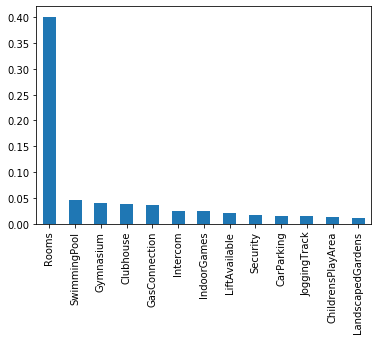

In [19]:
mutual_data.sort_values(ascending=False).plot.bar()

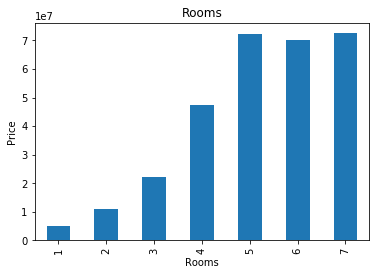

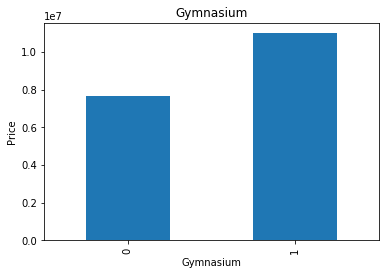

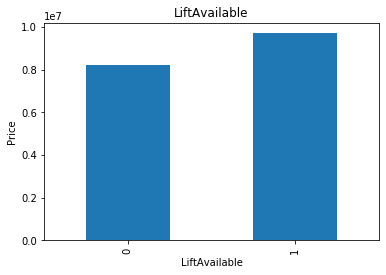

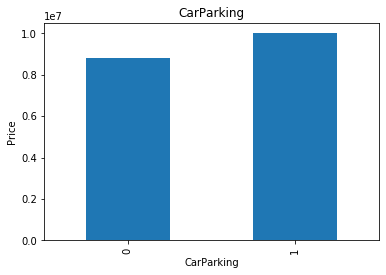

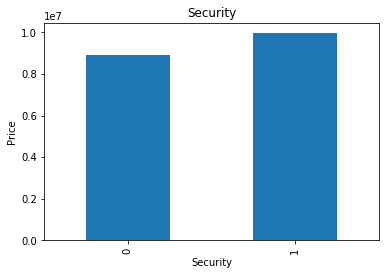

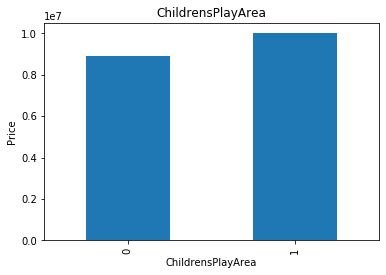

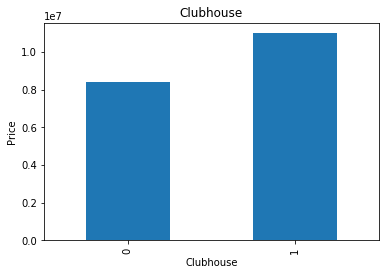

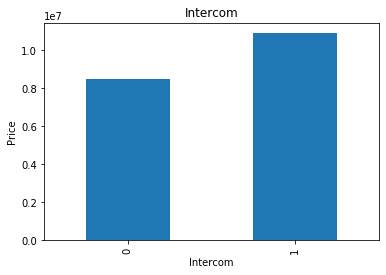

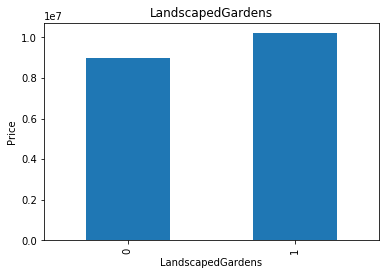

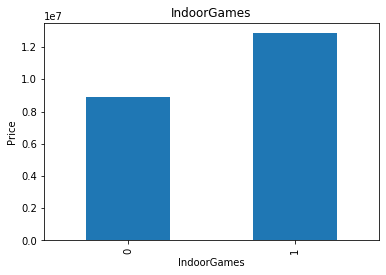

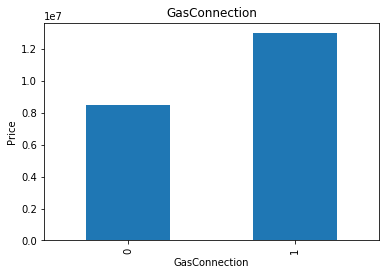

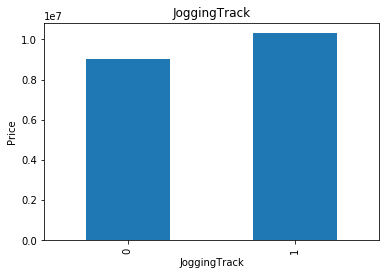

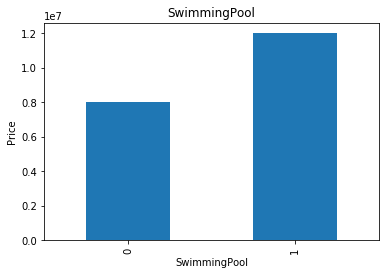

In [20]:
for features in discrete_variable:
    data=df.copy()
    data[features]=df.groupby(df[features])['Price'].median().plot.bar()
    plt.title(features)
    plt.xlabel(features)
    plt.ylabel('Price')
    plt.show()

In [21]:
continuous_varaible=[features for features in df.columns if features not in discrete_variable]
continuous_varaible

['Area', 'Location', 'Price']

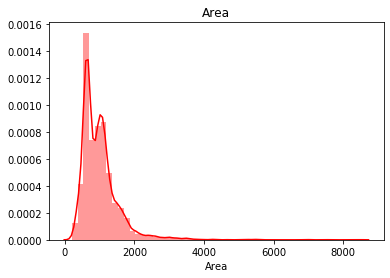

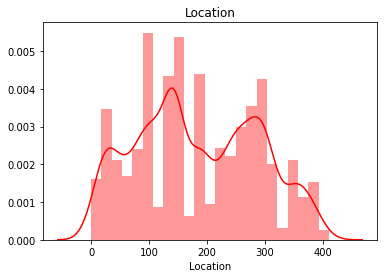

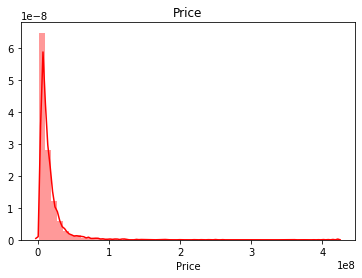

In [22]:
import seaborn as sns 
for features in continuous_varaible:
    data=df.copy()
    sns.distplot(df[features],color='r')
    plt.title(features)
    plt.show()

Text(0, 0.5, 'Arbitrary value')

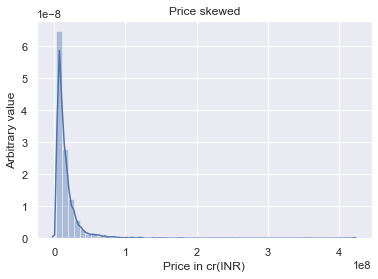

In [23]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Price'])
plt.title('Price skewed')
plt.xlabel('Price in cr(INR)')
plt.ylabel('Arbitrary value')

Text(0, 0.5, 'Arbitrary value')

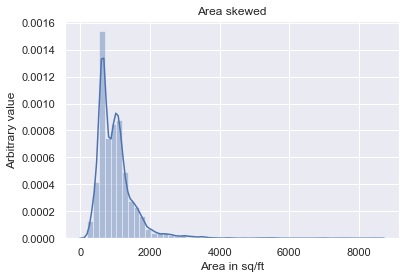

In [24]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Area'])
plt.title('Area skewed')
plt.xlabel('Area in sq/ft')
plt.ylabel('Arbitrary value')

In [25]:
df['Area']=np.log(df['Area'])
df['Price']=np.log(df["Price"])

Text(0, 0.5, 'Arbitrary value')

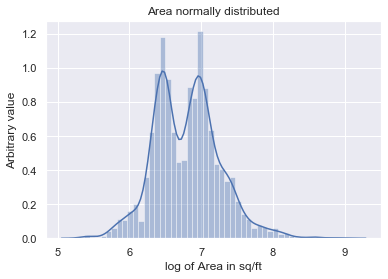

In [26]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Area'])
plt.title('Area normally distributed')
plt.xlabel('log of Area in sq/ft')
plt.ylabel('Arbitrary value')

Text(0, 0.5, 'Arbitrary value')

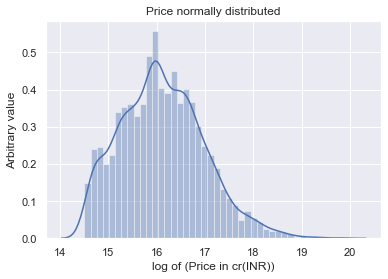

In [27]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Price'])
plt.title('Price normally distributed')
plt.xlabel('log of (Price in cr(INR))')
plt.ylabel('Arbitrary value')

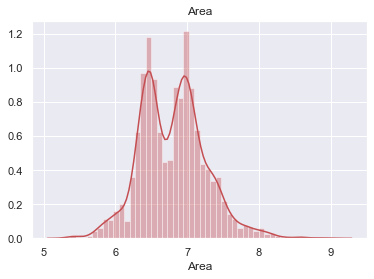

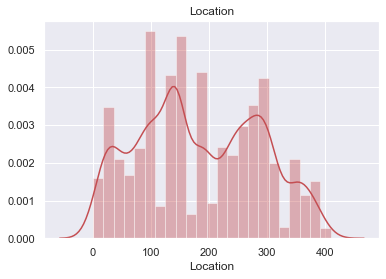

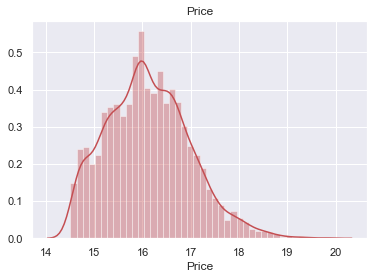

In [28]:
import seaborn as sns 
for features in continuous_varaible:
    data=df.copy()
    sns.distplot(df[features],color='r')
    plt.title(features)
    plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               6345 non-null   float64
 1   Location           6345 non-null   int64  
 2   Rooms              6345 non-null   int64  
 3   Gymnasium          6345 non-null   int64  
 4   LiftAvailable      6345 non-null   int64  
 5   CarParking         6345 non-null   int64  
 6   Security           6345 non-null   int64  
 7   ChildrensPlayArea  6345 non-null   int64  
 8   Clubhouse          6345 non-null   int64  
 9   Intercom           6345 non-null   int64  
 10  LandscapedGardens  6345 non-null   int64  
 11  IndoorGames        6345 non-null   int64  
 12  GasConnection      6345 non-null   int64  
 13  JoggingTrack       6345 non-null   int64  
 14  SwimmingPool       6345 non-null   int64  
 15  Price              6345 non-null   float64
dtypes: float64(2), int64(14)

Text(0.5, 1.0, 'Relation between Location and Price and number of rooms')

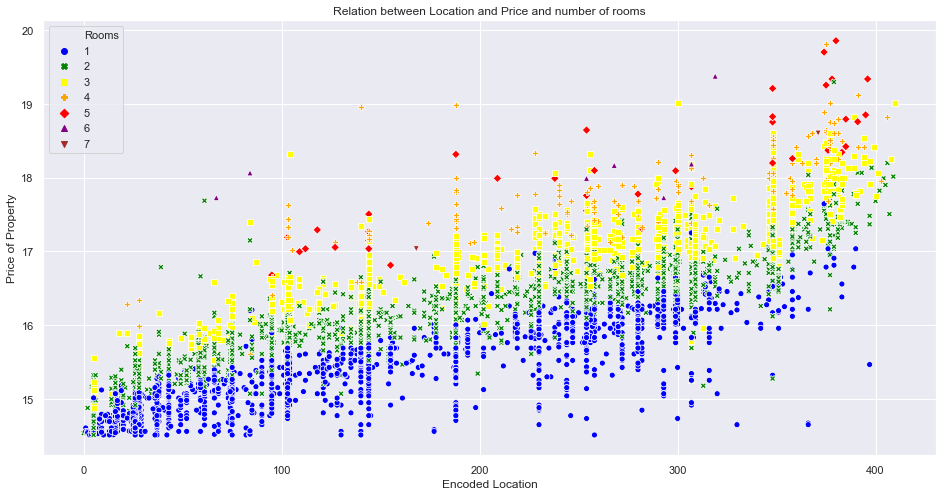

In [30]:
# sns.color_palette("Paired")
sns.set(rc={'figure.figsize':(16,8)})
sns.scatterplot(x='Location',y='Price',data=df,hue='Rooms',palette=['blue','green','yellow','orange','red','purple','brown'],style='Rooms')
plt.xlabel('Encoded Location')
plt.ylabel('Price of Property')
plt.title('Relation between Location and Price and number of rooms')

In [31]:
X=df.drop(["Price"],axis=1)
X.head()

,Area,Location,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool
0,6.579251,144,1,0,1,1,1,0,0,0,0,0,0,0,0
1,6.396930,144,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6.476972,144,1,1,1,1,1,1,1,1,0,0,0,1,1
3,6.476972,144,1,0,1,1,1,0,0,1,1,0,0,0,0
4,6.499787,144,1,0,1,1,1,0,0,1,1,0,0,0,0


In [32]:
Y=df['Price'].copy()
Y.head()

0    15.394489
1    15.319588
2    15.717618
3    15.319588
4    15.424948
Name: Price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [34]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

4441 1904 4441 1904


In [35]:
# from xgboost import XGBRegressor
from sklearn.linear_model import Ridge,LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
model=RandomForestRegressor(n_estimators = 200, max_depth = 12)
# model=ExtraTreesRegressor()
# model=GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.1)
# model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.1,
#              gpu_id=-1, importance_type='gain', interaction_constraints='',
#              learning_rate=0.0500000007, max_delta_step=0, max_depth=5,
#              min_child_weight=1, monotone_constraints='()',
#              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.9828343976790342

In [36]:
model.feature_importances_

array([0.15202478, 0.58036594, 0.24672509, 0.00128122, 0.00134299,
       0.00143006, 0.00187544, 0.00133428, 0.00171857, 0.00210737,
       0.00205984, 0.00251388, 0.00159079, 0.00204012, 0.00158964])

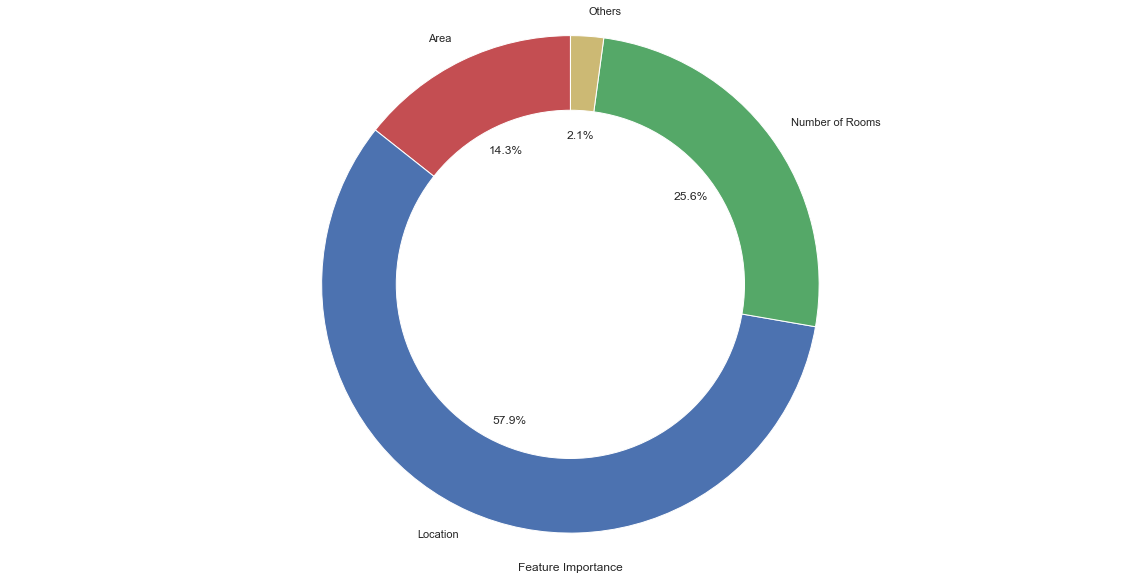

In [37]:
import matplotlib.pyplot as plt
# Pie chart

sizes = [0.14346, 0.57929, 0.25579,0.02137]
labels = ['Area', 'Location', 'Number of Rooms', 'Others']

#colors
colors = ['r','b','g','y']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors,labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.xlabel('Feature Importance')
plt.show()


In [38]:
model.score(X_test,Y_test)

0.9353312206093656

In [39]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
score=r2_score(Y_test,y_pred)
print(score)

0.9353312206093656


Text(0.5, 0, 'Blue(Predicted Value)/Red(Actual Value)')

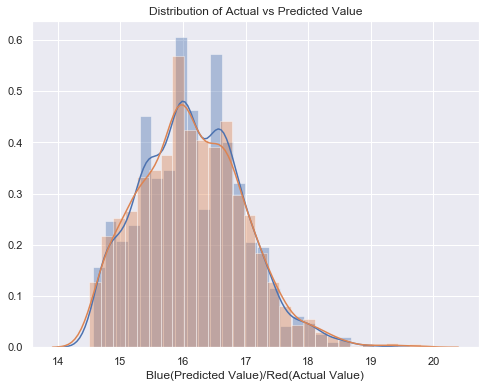

In [40]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_pred)
sns.distplot(Y_test)
plt.title('Distribution of Actual vs Predicted Value')
plt.xlabel('Blue(Predicted Value)/Red(Actual Value)')

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv=KFold(n_splits=5,shuffle=True,random_state=1)
print(cross_val_score(model,X,Y,scoring='r2',cv=10).mean())

0.9244350180763778


In [42]:
def predict_output(Area,location_encoded,Rooms,Gymnasium,LiftAvailable,CarParking,Security,ChildrensPlayArea,Clubhouse,Intercom,
                   LandscapedGardens,IndoorGames,GasConnection,JoggingTrack,SwimmingPool):
    
    x=np.zeros(len(X.columns))
    x[0]=np.log(Area)
    x[1]=loc_encode[location_encoded]
    x[2]=Rooms
    x[3]=Gymnasium
    x[4]=LiftAvailable
    x[5]=CarParking
    x[6]=Security
    x[7]=ChildrensPlayArea
    x[8]=Clubhouse
    x[9]=Intercom
    x[10]=LandscapedGardens
    x[11]=IndoorGames
    x[12]=GasConnection
    x[13]=JoggingTrack
    x[14]=SwimmingPool
    
    predict=model.predict([x])[0]
    print(np.exp(predict))

In [43]:
len(X.columns)

15

In [44]:
predict_output(1000,'Dombivali',2,1,1,1,1,1,1,1,1,1,1,1,1)

5436847.8608041825


In [45]:
predict_output(1000,'Kalyan',2,1,1,1,1,1,1,1,1,1,1,1,1)

5421931.61863065


In [46]:
predict_output(1000,'Mulund',2,1,1,1,1,1,1,1,1,1,1,1,1)

14819064.141666671


In [47]:
predict_output(1000,'Juhu',2,1,1,1,1,1,1,1,1,1,1,1,1)

38399714.291966744


In [48]:
predict_output(1000,'Sion',2,1,1,1,1,1,1,1,1,1,1,1,1)

18533935.973001216


In [49]:
# from sklearn.model_selection import RandomizedSearchCV
# params={'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
#        'n_estimators' : [400,500,600,700,800]}

# gv=RandomizedSearchCV(model,param_distributions=params,scoring='r2',cv=10)
# gv=gv.fit(X,Y)


In [50]:
# print(gv.best_score_)
# print(gv.best_params_)
# 0.924485615940845
# {'n_estimators': 400, 'learning_rate': 0.1}

In [51]:
# from sklearn.model_selection import RandomizedSearchCV
# params={'max_depth':[5,6,7,8,9,10,11,12,13,14,15],
#        'n_estimators':[50,100,200,300,400,500,1000]}

# gv=RandomizedSearchCV(model,param_distributions=params,scoring='r2',cv=10)
# gv.fit(X,Y)

In [52]:
# print(gv.best_score_)
# print(gv.best_params_)
# 0.9244805660433342
# {'n_estimators': 200, 'max_depth': 12}

In [53]:
# from sklearn.model_selection import RandomizedSearchCV
# params={'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]}

# rv=RandomizedSearchCV(model,param_distributions=params,scoring='r2',cv=cv)
# rv.fit(X,Y)
# print(rv.best_score_)
# print(rv.best_params_)

Text(0, 0.5, 'Machine Learning Algorithm')

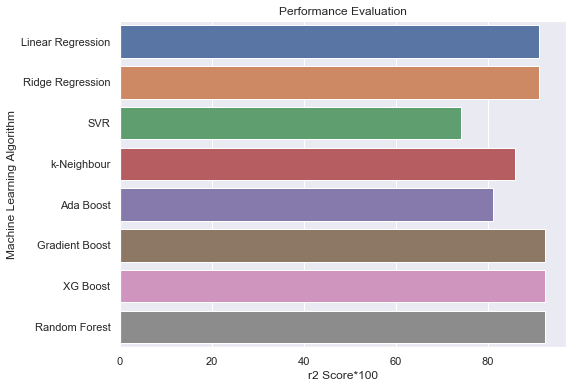

In [54]:
# Linear Regression : 0.910573103242809
# Ridge Regression : 0.9105814781156265
# SVR : 0.7426253391736471    
# k-Neighbour : 0.8601602072824667    
# Ada Boost : 0.8119448550989302
# Gradient Boost : 0.9247354894991864    
# XG Boost : 0.9245608777424721   
# Random Forest : 0.9243831670710094
    
name = ['Linear Regression','Ridge Regression','SVR','k-Neighbour','Ada Boost','Gradient Boost','XG Boost','Random Forest']
value = [91.057,91.058,74.262,86.016,81.194,92.473,92.456,92.438]      

sns.barplot(x=value,y=name)
plt.title('Performance Evaluation')
plt.xlabel('r2 Score*100')
plt.ylabel('Machine Learning Algorithm')

In [55]:
import pickle
with open('Final_model.pickle','wb') as f :
    pickle.dump(model,f)

In [56]:
# params={'n_estimators':[100,200,300,400,500,1000],
#  "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
#  "reg_alpha":[0,1],
#  "reg_lambda":[0,1]   
# }

# from xgboost import XGBRegressor
# model= XGBRegressor()
# from sklearn.model_selection import KFold,RandomizedSearchCV
# cv=KFold(n_splits=5,shuffle=True,random_state=0)
# random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='r2',cv=cv,verbose=3)
# random_search.fit(X,Y)

In [57]:
# random_search.best_estimator_ 
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.1,
#              gpu_id=-1, importance_type='gain', interaction_constraints='',
#              learning_rate=0.0500000007, max_delta_step=0, max_depth=5,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)


In [58]:
# random_search.best_score_ 
# 0.9351551163832076
